In [1]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy
import scipy.sparse as sparse

#from numba import jit 

%load_ext autoreload
%autoreload 2   
%matplotlib inline

sys.path.insert(0,os.pardir)
from debug_init import *    
import rt1kernel
import rt1raytrace
#import sparse_dot_mkl

In [2]:
RT1_kernel = rt1kernel.Kernel2D_scatter(dxf_file='..\\dxf_files\\simplest0.dxf',show_print=False)


you have to "create_induced_point()" or "set_induced_point()" next.


In [3]:
Obs = rt1kernel.Observation_Matrix_integral_load_model(path='..\\test_forward\\model2\\Observation_Matrix_integral_20220619.pkl')
ray = Obs.Hs[0].ray


Arcs  detection: 100%|██████████| 9/9 [00:00<00:00, 143.87it/s]


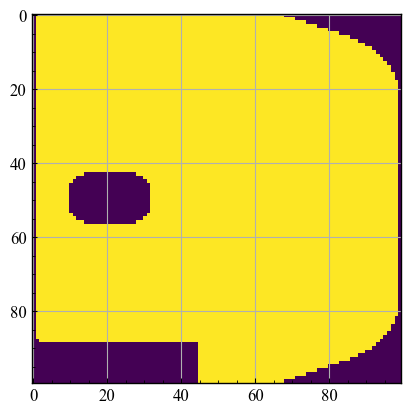

In [12]:

r_grid = np.linspace(0.09,1.,100)
z_grid = np.linspace(-0.6,0.6,100)
mask,im_kwargs = RT1_kernel.grid_input(r_grid,z_grid)


plt.imshow(RT1_kernel.Is_in)

In [13]:
R,Z = r_grid,z_grid
R_ext = np.empty(R.size+1,dtype=np.float64)  
Z_ext = np.empty(Z.size+1,dtype=np.float64)
R_ext[0] =  R[0]  - 0.5* (R[1]-R[0])
R_ext[-1] = R[-1] + 0.5* (R[-1]-R[-2])
R_ext[1:-1] = 0.5 * (R[:-1] + R[1:])
Z_ext[0] =  Z[0]  - 0.5* (Z[1]-Z[0])
Z_ext[-1] = Z[-1] + 0.5* (Z[-1]-Z[-2])
Z_ext[1:-1] = 0.5 * (Z[:-1] + Z[1:])

r,z = 0.5,0.5

Rray,Zray = ray.RZ_ray(100)
dL = ray.Length/ (Lnum+1)
is_rin = (r>R_ext[0:-1]) * (r <=R_ext[1:])
is_zin = (z>Z_ext[0:-1]) * (z <=Z_ext[1:])

for i in range(ray.shape[0]):
    for j in range(ray.shape[1]):
        pass 



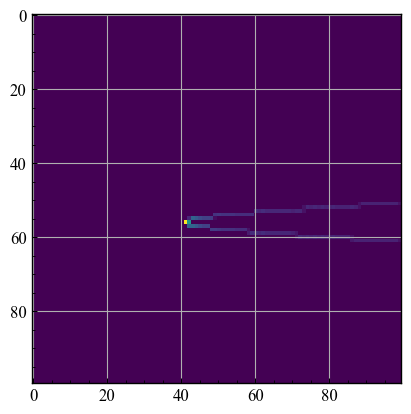

In [18]:

Lnum= 1000
Rray,Zray = ray.RZ_ray(Lnum)
dL = ray.Length/ (Lnum+1)
i,j = 150,100 
ray_map = np.zeros((z_grid.size,r_grid.size),dtype=np.int16)
for k in range(Lnum):
    r,z = Rray[k,i,j], Zray[k,i,j]
    is_rin = (r>R_ext[0:-1]) * (r <=R_ext[1:])
    is_zin = (z>Z_ext[0:-1]) * (z <=Z_ext[1:])
    ray_map[is_zin,is_rin] += 1


plt.imshow(ray_map)

you have to "create_induced_point()" or "set_induced_point()" next.


Arcs  detection: 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]


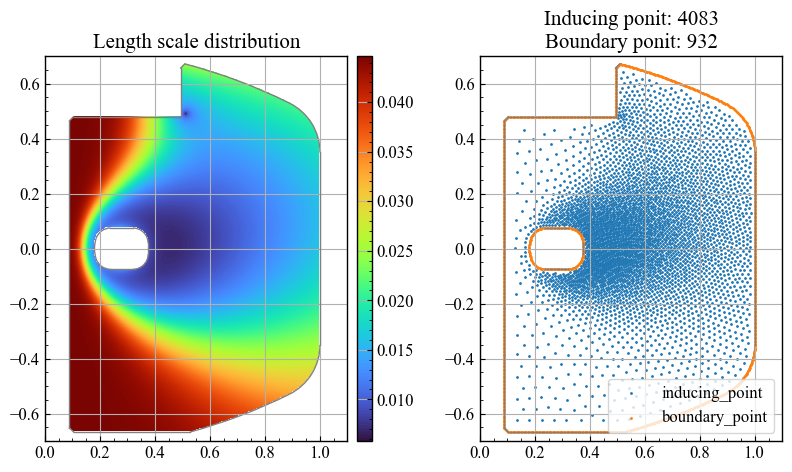

In [7]:
RT1_kernel = rt1kernel.Kernel2D_scatter(dxf_file='..\\dxf_files\\simplest0.dxf',show_print=False)
RT1_kernel.load_point(**np.load('..\\test_forward\\point_20220614.npz'),length_sq_fuction=Length_scale_sq,is_plot=True)

rI,zI = RT1_kernel.rI,RT1_kernel.zI
nI    = RT1_kernel.nI
